In [11]:
import numpy as np
import netCDF4
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import statsmodels.api as sm
import pandas as pd

CIRCUMFERENCE = 40075000 # [m], circumference

def latlon2xy(lat, lon, lat_origin, lon_origin):
    x = np.deg2rad((lat - lat_origin)) / 2 / np.pi * CIRCUMFERENCE
    y = np.deg2rad((lon - lon_origin)) / 2 / np.pi * CIRCUMFERENCE * np.cos(np.deg2rad(lat))
    return x, y

In [12]:
lat_origin = 63.3
lon_origin = 10.4

FILEPATH = "/Users/yaolin/HomeOffice/MAFIA/EDA/"
FIGPATH = FILEPATH + "fig/"
data_auv = pd.read_csv(FILEPATH + "auv.csv").to_numpy()
data_sinmod = pd.read_csv(FILEPATH + "sinmod.csv").to_numpy()

lat_auv = data_auv[:, 0]
lon_auv = data_auv[:, 1]
depth_auv = data_auv[:, 2]
sal_auv = data_auv[:, 3]
sal_sinmod = data_sinmod[:, 3]
x_auv, y_auv = latlon2xy(lat_auv, lon_auv, lat_origin, lon_origin)
z_auv = depth_auv
sal_residual = sal_auv - sal_sinmod

In [18]:
path_beta = "/Users/yaolin/Library/CloudStorage/OneDrive-NTNU/MASCOT_PhD/Publication/Nidelva/Experiment/Coef/"
beta0 = np.loadtxt(path_beta + "beta0.txt", delimiter=',')
beta1 = np.loadtxt(path_beta + "beta1.txt", delimiter=',')


In [27]:
path_sinmod = "/Users/yaolin/Library/CloudStorage/OneDrive-NTNU/MASCOT_PhD/Data/Nidelva/SINMOD_DATA/samples_2021.05.27.nc"
sinmod = netCDF4.Dataset(path_sinmod)
ref_timestamp = datetime.strptime("2021.05.27", "%Y.%m.%d").timestamp()
timestamp = np.array(sinmod["time"]) * 24 * 3600 + ref_timestamp #change ref timestamp
lat_sinmod = np.array(sinmod['gridLats'])
lon_sinmod = np.array(sinmod['gridLons'])
depth_sinmod = np.array(sinmod['zc'])
salinity_sinmod = np.array(sinmod['salinity'])
x_sinmod, y_sinmod = latlon2xy(lat_sinmod, lon_sinmod, lat_origin, lon_origin)

In [24]:
sal_sinmod_top = np.mean(salinity_sinmod[:, 0, :, :], axis=0)

In [32]:
data_sinmod = []
for i in range(x_sinmod.shape[0]):
    for j in range(y_sinmod.shape[1]):
        data_sinmod.append([x_sinmod[i, j], y_sinmod[i, j], sal_sinmod_top[i, j]])
data_sinmod = np.array(data_sinmod)

In [34]:
adjusted_sinmod = beta0[0, 0] + beta1[0, 0] * data_sinmod[:, 2]

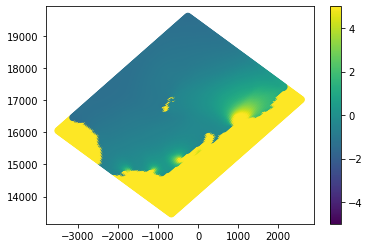

In [39]:
residual = adjusted_sinmod - data_sinmod[:, 2]

plt.scatter(data_sinmod[:, 1], data_sinmod[:, 0], c=residual, vmin=-5, vmax=5)
plt.colorbar()

